# Taller Práctico Clase 9: Reducción de Dimensionalidad

**Objetivo:** En este taller, aplicaremos y compararemos las tres técnicas de reducción de dimensionalidad vistas en clase: PCA (Análisis de Componentes Principales), t-SNE y UMAP. 

**Dataset:** Usaremos el dataset `digits` de Scikit-learn, que contiene imágenes de 8x8 píxeles de dígitos escritos a mano (0-9). Cada imagen está "aplanada" en un vector de 64 características (dimensiones), lo que lo convierte en un excelente candidato para la reducción de dimensionalidad y la visualización.

## 1. Configuración e Importación de Librerías

In [3]:
# Librerías para manipulación de datos
import numpy as np
import pandas as pd

# Librerías para visualización
import plotly.express as px
import matplotlib.pyplot as plt

# Scikit-learn para carga de datos, preprocesamiento y modelos
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# UMAP (es necesario instalarlo: pip install umap-learn)
import umap

# Configuraciones adicionales
pd.options.plotting.backend = 'plotly'

C:\Users\fsanches\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Carga y Exploración del Dataset

In [4]:
# Cargamos el dataset de dígitos
digits = load_digits()

# X tiene los datos de las imágenes (las características)
X = digits.data

# y contiene las etiquetas verdaderas (el dígito del 0 al 9)
y = digits.target

print(f"Forma de la matriz de características (X): {X.shape}")
print(f"Forma del vector de etiquetas (y): {y.shape}")

Forma de la matriz de características (X): (1797, 64)
Forma del vector de etiquetas (y): (1797,)


Cada imagen tiene 64 píxeles (8x8), que actúan como nuestras características. Tenemos 1797 imágenes en total.

Para tener una idea de cómo se ven los datos, podemos visualizar algunas de las imágenes.

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [23]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

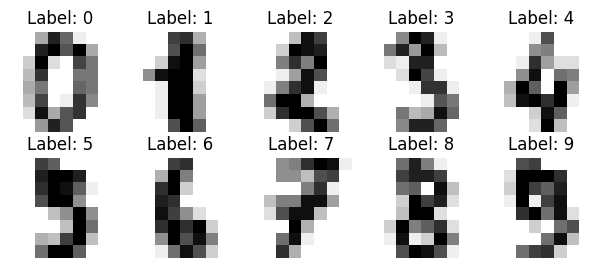

In [6]:
plt.figure(figsize=(7.5, 3))
for index, (image, label) in enumerate(zip(digits.images[:10], digits.target[:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('Label: %i' % label)
plt.show()

## 3. Preprocesamiento: Escalado de Datos

Como vimos en la teoría, PCA es sensible a la escala de las características. Aunque en este caso todos los píxeles están en una escala similar (0-16), es una buena práctica estandarizar los datos para que tengan media 0 y desviación estándar 1. Esto asegura que cada característica contribuya por igual al análisis.

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4. Análisis de Componentes Principales (PCA)

Comenzaremos aplicando PCA para reducir la dimensionalidad de 64 a 2 componentes para poder visualizar los datos en un gráfico de dispersión.

### 4.1. Varianza Explicada

Antes de reducir a 2D, es útil ajustar PCA con todos los componentes posibles para ver cuánta varianza explica cada uno. El **Scree Plot** nos ayudará a decidir cuántos componentes son "suficientes".

In [8]:
# Ajustamos PCA sin especificar n_components para mantenerlos todos
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculamos la varianza explicada acumulada
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Creamos el Scree Plot
fig = px.area(x=range(1, cumulative_variance.shape[0] + 1),
              y=cumulative_variance,
              labels={"x": "Número de Componentes Principales", "y": "Varianza Explicada Acumulada"},
              title="Scree Plot: Varianza Explicada por los Componentes Principales")
fig.update_layout(yaxis_range=[0,1.05])
fig.add_hline(y=0.9, line_dash="dash", line_color="red")
fig.add_annotation(x=30, y=0.9, text="90% de Varianza Explicada", showarrow=True, arrowhead=1)
fig.show()

**Interpretación:** Podemos ver que con aproximadamente 10 componentes ya capturamos más del 60% de la varianza, y con unos 30 componentes, superamos el 90%. Esto nos dice que hay mucha redundancia en los 64 píxeles y que podemos representar los datos con mucha menos información sin una pérdida masiva.

Ahora, vamos a reducir a solo 2 componentes para la visualización.

### 4.2. Reducción a 2D y Visualización

In [9]:
# Aplicamos PCA para reducir a 2 dimensiones
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

# Creamos un DataFrame para facilitar la visualización con Plotly
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y.astype(str) # Convertimos la etiqueta a string para colores discretos

# Visualizamos
fig = px.scatter(df_pca, x='PC1', y='PC2', color='label',
                 title='Visualización del Dataset Digits con PCA (2 Componentes)',
                 labels={'color': 'Dígito'})
fig.show()

**Análisis de PCA:** PCA logra una separación decente para algunos dígitos (como el 0, 4 y 6), pero muchos otros se superponen significativamente. Esto es esperado, ya que PCA está limitado a proyecciones lineales.

## 5. t-SNE (t-distributed Stochastic Neighbor Embedding)

Ahora, aplicaremos t-SNE, una técnica no lineal, para ver si podemos obtener una mejor separación visual de los clusters de dígitos.

In [10]:
# Aplicamos t-SNE. Perplexity es un hiperparámetro importante.
tsne = TSNE(n_components=2, perplexity=100, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)

# Creamos el DataFrame para Plotly
df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['label'] = y.astype(str)

# Visualizamos
fig = px.scatter(df_tsne, x='TSNE1', y='TSNE2', color='label',
                 title='Visualización del Dataset Digits con t-SNE',
                 labels={'color': 'Dígito'})
fig.show()

**Análisis de t-SNE:** ¡El resultado es drásticamente mejor! t-SNE logra formar clusters muy definidos y separados para cada dígito. Esto demuestra el poder de los métodos no lineales para visualizar estructuras de datos complejas. Recordemos la advertencia: las distancias entre los clusters en t-SNE no son necesariamente significativas.

## 6. UMAP (Uniform Manifold Approximation and Projection)

Finalmente, probaremos UMAP, la alternativa moderna a t-SNE.

In [11]:
# Aplicamos UMAP. n_neighbors y min_dist son hiperparámetros clave.
reducer = umap.UMAP(n_neighbors=15, min_dist=0.0, n_components=2)
X_umap = reducer.fit_transform(X_scaled)

# Creamos el DataFrame para Plotly
df_umap = pd.DataFrame(data=X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['label'] = y.astype(str)

# Visualizamos
fig = px.scatter(df_umap, x='UMAP1', y='UMAP2', color='label',
                 title='Visualización del Dataset Digits con UMAP',
                 labels={'color': 'Dígito'})
fig.show()

## 7. Conclusiones del Taller

- **PCA** es una herramienta rápida y útil para una reducción de dimensionalidad lineal. Es excelente como paso de preprocesamiento, pero puede no ser la mejor para la visualización de estructuras complejas.
- **t-SNE** es excepcional para revelar la estructura de clusters locales en los datos, produciendo visualizaciones muy claras y separadas.
- **UMAP** ofrece resultados de visualización de alta calidad, a menudo comparables o superiores a los de t-SNE, pero con la ventaja de ser significativamente más rápido y, a menudo, preservar mejor la estructura global de los datos.

**Análisis de UMAP:** UMAP también produce una excelente separación de los clusters, similar a t-SNE. A menudo, UMAP es mucho más rápido que t-SNE (aunque en este dataset pequeño la diferencia no es tan notable) y puede preservar mejor la estructura global de los datos. Observa cómo algunos clusters (como el '4' y el '7') pueden aparecer más cercanos entre sí, lo que podría reflejar una mayor similitud intrínseca.

---

## ✍️ Ejercicios Propuestos

1.  **Varianza en PCA:** ¿Cuántos componentes principales son necesarios para explicar el 95% de la varianza en el dataset `digits`? Vuelve a ejecutar el análisis del Scree Plot y encuentra el número exacto.

2.  **Experimenta con t-SNE:** Modifica el hiperparámetro `perplexity` en el modelo t-SNE a valores más bajos (ej. 5) y más altos (ej. 200). ¿Cómo cambia la visualización? ¿Qué parece controlar este parámetro?

3.  **Experimenta con UMAP:** Modifica el hiperparámetro `n_neighbors` en el modelo UMAP a valores más bajos (ej. 5) y más altos (ej. 50). ¿Cómo afecta esto a la separación de los clusters y a la estructura global?

4.  **Visualización 3D:** Adapta el código de PCA, t-SNE y UMAP para reducir los datos a 3 componentes (`n_components=3`). Utiliza `plotly.express.scatter_3d` para crear visualizaciones tridimensionales. ¿Añade la tercera dimensión una mejor perspectiva?

5.  **Impacto en un Clasificador:** Entrena un modelo simple, como `LogisticRegression` de Scikit-learn, sobre los datos originales escalados (`X_scaled`). Luego, entrena el mismo modelo sobre los datos reducidos por PCA (usando suficientes componentes para capturar el 95% de la varianza). Compara el tiempo de entrenamiento y la precisión (accuracy) de ambos modelos. ¿Qué observas?

6.  **Interpretando los Componentes Principales:** El objeto `pca_2d` contiene los `components_` (loadings). Cada componente es un vector de 64 elementos. "Reforma" (`reshape`) el primer componente principal a una imagen de 8x8 y visualízalo con `plt.imshow`. ¿Qué parece representar este componente? ¿Qué píxeles son los más importantes?

7.  **Aplicación a otro Dataset:** Carga el dataset `load_wine` de Scikit-learn. Este dataset tiene 13 características. Aplica PCA, t-SNE y UMAP para visualizar las 3 clases de vinos. ¿Cuál técnica funciona mejor para separar las clases?
le? ¿Por qué?


**Observación sobre el punto 5:**
En mi PC observé los siguientes datos de accuracy y tiempo, como para darles una referencia:

| Métrica                     | Modelo Original | Modelo con PCA |
|-----------------------------|----------------|---------------|
| Número de Características   | 64             | 39            |
| Tiempo de Entrenamiento     | 0.0340         | 0.0062        |
| Precisión (Accuracy)        | 0.9796         | 0.9630        |

### Ejercicio 1: Varianza en PCA. Cuanto componentes son necesarios para explicar el 95% de la varianza en digits?

#### Parece que aprox 40 componentes. 

In [11]:
# Ajustamos PCA sin especificar n_components para mantenerlos todos
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculamos la varianza explicada acumulada
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Creamos el Scree Plot
fig = px.area(x=range(1, cumulative_variance.shape[0] + 1),
              y=cumulative_variance,
              labels={"x": "Número de Componentes Principales", "y": "Varianza Explicada Acumulada"},
              title="Scree Plot: Varianza Explicada por los Componentes Principales")
fig.update_layout(yaxis_range=[0,1.05])
fig.add_hline(y=0.9, line_dash="dash", line_color="red")
fig.add_annotation(x=40, y=0.95, text="95% de Varianza Explicada", showarrow=True, arrowhead=1)
fig.show()

### Ejercicio 2:  **Experimenta con t-SNE:** Modifica el hiperparámetro `perplexity` en el modelo t-SNE a valores más bajos (ej. 5) y más altos (ej. 200). ¿Cómo cambia la visualización? ¿Qué parece controlar este parámetro?

In [12]:
perplexities = [5, 30, 100, 200]
for perp in perplexities:
    # Aplicamos t-SNE. Perplexity es un hiperparámetro importante.
    tsne = TSNE(n_components=2, perplexity=perp, random_state=1)
    X_tsne = tsne.fit_transform(X_scaled)

    # Creamos el DataFrame para Plotly
    df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
    df_tsne['label'] = y.astype(str)

    # Visualizamos
    fig = px.scatter(df_tsne, x='TSNE1', y='TSNE2', color='label',
                    title='Visualización del Dataset Digits con t-SNE= '+str(perp),
                    labels={'color': 'Dígito'})
    fig.show()

#### Parece controlar la cantidad de clusters que se van generando, como si la cantidad de centros bajo los que se agrupa variaria. Asi a mayor preplexity se van definiendo mejor los grupos, pero un numero grande tambien hacen que los que son vecinos no se agrupen tan bien.

### 3.  **Experimenta con UMAP:** Modifica el hiperparámetro `n_neighbors` en el modelo UMAP a valores más bajos (ej. 5) y más altos (ej. 50). ¿Cómo afecta esto a la separación de los clusters y a la estructura global?


In [13]:
n_neighbors_list = [5, 15, 50,100,200]
for n_neighbors_i in n_neighbors_list:
    # Aplicamos UMAP. n_neighbors y min_dist son hiperparámetros clave.
    reducer = umap.UMAP(n_neighbors=n_neighbors_i, min_dist=0.0, n_components=2)
    X_umap = reducer.fit_transform(X_scaled)

    # Creamos el DataFrame para Plotly
    df_umap = pd.DataFrame(data=X_umap, columns=['UMAP1', 'UMAP2'])
    df_umap['label'] = y.astype(str)

    # Visualizamos
    fig = px.scatter(df_umap, x='UMAP1', y='UMAP2', color='label',
                    title='Visualización del Dataset Digits con UMAP n_neighbors= '+str(n_neighbors_i),
                    labels={'color': 'Dígito'})
    fig.show()

### A medida que va aumento el número de veciones los cluster se van apiñando, esto es, estan mas cerca entre ellos, por lo tanto aquellos elementos que presentan confución se mezclan mas.

### 4.  **Visualización 3D:** Adapta el código de PCA, t-SNE y UMAP para reducir los datos a 3 componentes (`n_components=3`). Utiliza `plotly.express.scatter_3d` para crear visualizaciones tridimensionales. ¿Añade la tercera dimensión una mejor perspectiva?


In [14]:
# 4.  **Visualización 3D:** Adapta el código de PCA, t-SNE y UMAP para reducir los datos a 3 componentes (`n_components=3`). Utiliza `plotly.express.scatter_3d` 
# para crear visualizaciones tridimensionales. ¿Añade la tercera dimensión una mejor perspectiva?
# Ajustamos PCA para reducir a 3 dimensiones
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)
# Creamos un DataFrame para facilitar la visualización con Plotly
df_pca_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2','PC3'])
df_pca_3d['label'] = y.astype(str) # Convertimos la etiqueta a string para colores discretos
# Visualizamos
fig = px.scatter_3d(df_pca_3d, x='PC1', y='PC2', z='PC3', color='label',
                 title='Visualización del Dataset Digits con PCA (3 Componentes)',
                 labels={'color': 'Dígito'})

fig.update_layout(
    width=1000,   # ancho en píxeles
    height=800    # alto en píxeles
)
fig.show()



### Al estar tan apiñados en realidad se ve mejor en 2d que en 3d asi no suma mucho

### 5.  **Impacto en un Clasificador:** Entrena un modelo simple, como `LogisticRegression` de Scikit-learn, sobre los datos originales escalados (`X_scaled`). Luego, entrena el mismo modelo sobre los datos reducidos por PCA (usando suficientes componentes para capturar el 95% de la varianza). Compara el tiempo de entrenamiento y la precisión (accuracy) de ambos modelos. ¿Qué observas?


In [15]:
#5.  **Impacto en un Clasificador:** Entrena un modelo simple, como `LogisticRegression` de Scikit-learn, 
# sobre los datos originales escalados (`X_scaled`). Luego, entrena el mismo modelo sobre los datos reducidos por 
# PCA (usando suficientes componentes para capturar el 95% de la varianza). Compara el tiempo de entrenamiento y la precisión (accuracy) de ambos modelos. ¿Qué observas?

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time 
# Dividimos los datos originales en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Entrenamos el modelo en los datos originales
model_original = LogisticRegression(max_iter=1000)
start_time = time.time()
model_original.fit(X_train, y_train)
end_time = time.time()
training_time_original = end_time - start_time
# Hacemos predicciones y calculamos la precisión
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Datos Originales - Tiempo de Entrenamiento: {training_time_original:.4f} segundos, Precisión: {accuracy_original:.4f}")
# Ahora reducimos los datos con PCA para capturar el 95% de la varianza
pca_95 = PCA(n_components=40) # Según el scree plot, 40 componentes capturan más del 95% de la varianza
X_pca_95 = pca_95.fit_transform(X_scaled)
# Dividimos los datos reducidos en conjunto de entrenamiento y prueba
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_95, y, test_size=0.2, random_state=42)
# Entrenamos el modelo en los datos reducidos
model_pca = LogisticRegression(max_iter=1000)
start_time = time.time()
model_pca.fit(X_train_pca, y_train_pca)
end_time = time.time()
training_time_pca = end_time - start_time
# Hacemos predicciones y calculamos la precisión
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"PCA (95% Varianza) - Tiempo de Entrenamiento: {training_time_pca:.4f} segundos, Precisión: {accuracy_pca:.4f}")


Datos Originales - Tiempo de Entrenamiento: 0.0259 segundos, Precisión: 0.9722
PCA (95% Varianza) - Tiempo de Entrenamiento: 0.0179 segundos, Precisión: 0.9611


#### Aca no hubo mucha diferencia en tiempo de entrenamiento, pero si en precision, siendo mejor la del modelo con regresion logistica que con PCA, pero por muy poco.


### 6.  **Interpretando los Componentes Principales:** El objeto `pca_2d` contiene los `components_` (loadings). Cada componente es un vector de 64 elementos. "Reforma" (`reshape`) el primer componente principal a una imagen de 8x8 y visualízalo con `plt.imshow`. ¿Qué parece representar este componente? ¿Qué píxeles son los más importantes?


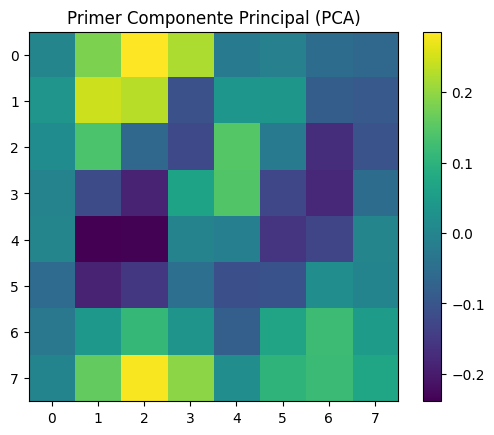

In [16]:
#6.  **Interpretando los Componentes Principales:** El objeto `pca_2d` contiene los `components_` 
# (loadings). Cada componente es un vector de 64 elementos. "Reforma" (`reshape`) 
# el primer componente principal a una imagen de 8x8 y visualízalo con `plt.imshow`. ¿Qué parece representar este componente? ¿Qué píxeles son los más importantes?

first_component = pca_2d.components_[0].reshape(8, 8)
plt.imshow(first_component, cmap='viridis')
plt.colorbar()
plt.title('Primer Componente Principal (PCA)')
plt.show()


### Podrían ser los que estan en las puntas a la izq porque son de mas varianza


### 7.  **Aplicación a otro Dataset:** Carga el dataset `load_wine` de Scikit-learn. Este dataset tiene 13 características. Aplica PCA, t-SNE y UMAP para visualizar las 3 clases de vinos. ¿Cuál técnica funciona mejor para separar las clases? le? ¿Por qué?

In [17]:

#7.  **Aplicación a otro Dataset:** Carga el dataset `load_wine` de Scikit-learn. 
# Este dataset tiene 13 características. Aplica PCA, t-SNE y UMAP para visualizar las 3 clases de vinos. ¿Cuál técnica funciona mejor para separar las clases?
#le? ¿Por qué?

from sklearn.datasets import load_wine
# Cargamos el dataset de vinos
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
# Estandarizamos los datos
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)
# Aplicamos PCA para reducir a 2 dimensiones
pca_wine = PCA(n_components=2)
X_wine_pca = pca_wine.fit_transform(X_wine_scaled)
# Creamos un DataFrame para facilitar la visualización con Plotly
df_wine_pca = pd.DataFrame(data=X_wine_pca, columns=['PC1', 'PC2'])
df_wine_pca['label'] = y_wine.astype(str) # Convertimos la etiqueta a string para colores discretos
# Visualizamos PCA
fig = px.scatter(df_wine_pca, x='PC1', y='PC2', color='label',
                 title='Visualización del Dataset Wine con PCA (2 Componentes)',
                 labels={'color': 'Clase de Vino'})
fig.show()
# Aplicamos t-SNE
tsne_wine = TSNE(n_components=2, perplexity=30, random_state=1)
X_wine_tsne = tsne_wine.fit_transform(X_wine_scaled)
# Creamos el DataFrame para Plotly
df_wine_tsne = pd.DataFrame(data=X_wine_tsne, columns=['TSNE1', 'TSNE2'])
df_wine_tsne['label'] = y_wine.astype(str)
# Visualizamos t-SNE
fig = px.scatter(df_wine_tsne, x='TSNE1', y='TSNE2', color='label',
                 title='Visualización del Dataset Wine con t-SNE',
                 labels={'color': 'Clase de Vino'})
fig.show()
# Aplicamos UMAP    
reducer_wine = umap.UMAP(n_neighbors=15, min_dist=0.0, n_components=2)
X_wine_umap = reducer_wine.fit_transform(X_wine_scaled)
# Creamos el DataFrame para Plotly
df_wine_umap = pd.DataFrame(data=X_wine_umap, columns=['UMAP1', 'UMAP2'])
df_wine_umap['label'] = y_wine.astype(str)
# Visualizamos UMAP     
fig = px.scatter(df_wine_umap, x='UMAP1', y='UMAP2', color='label',
                 title='Visualización del Dataset Wine con UMAP',
                 labels={'color': 'Clase de Vino'})
fig.show()


### Markdown parece funcionar mejor porque define mas los cluster, sin embargo se filtran los rojos en otros clusters pero eso aparece en todos los métodos, en cambio en este aprecen mucho mas separados